Time for trapz manual method: 8.32e-04 seconds
Manual trapz: 0.8862067342802125
np.trapz: 0.8862067342802126
Using scipy quad: 0.8862073482595214
Error from manual to np.trapz: 1.1102e-16
Error from manual to scipy quad: 6.1398e-07
Error in scipy quad integration: 3.1768e-11


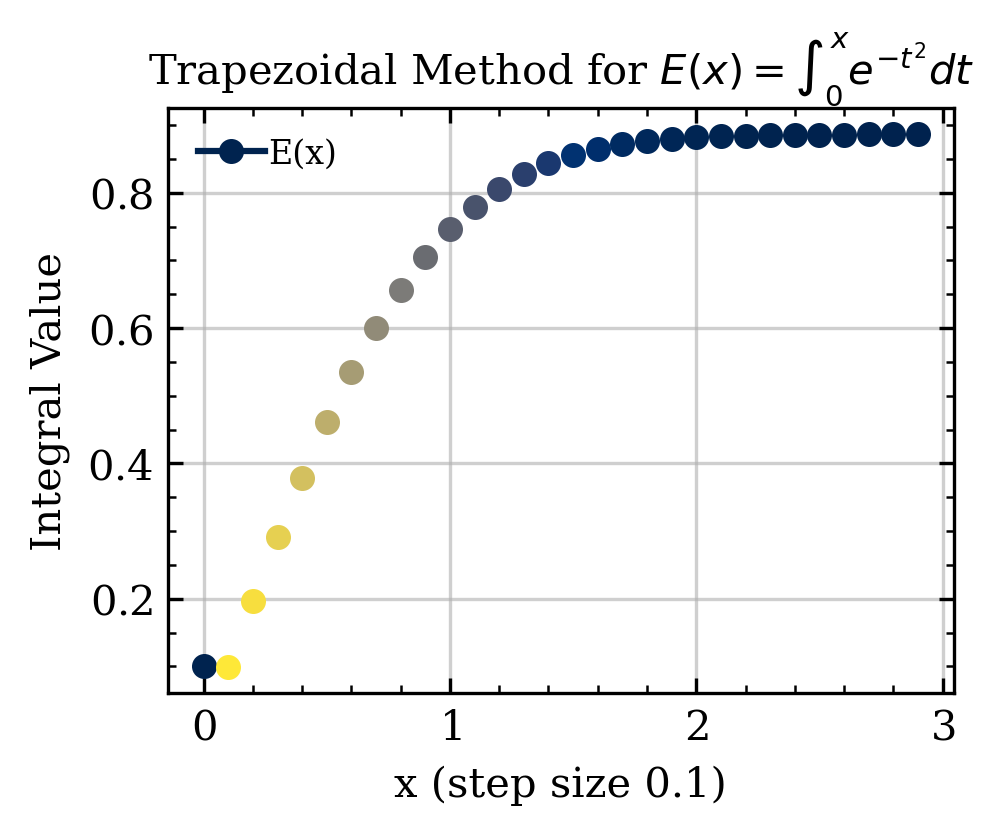

In [90]:
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.integrate import quad
import time

mpl.style.use('mesa.mplstyle')

# define the function we want to integrate
def E(t):
    return np.exp(-t**2)

def manual_trap(a: int=0, b: int=3, N: int=10000, interval: float=0.1):
    '''
    calculate the integral from a to b using the trapezoid method, 
    recording the value at intervals of interval, using N slices over the 
    interval, or about 3,300 slices per evaluation point.
    plot the calculation at the 0.1 step marks for the x values 
    between 0 and 3.

    args:
        a (int): the starting value of the interval
        b (int): the endpoint of the interval
        N (int): the number of slices used for the integration
        interval (float): the interval at which the value of the integral should be recorded
    '''
    # break the interval into (b-a)*step stepsize intervals
    x = np.arange(a, b+step, step) # ensure range includes endpoint
    # create the array of slices
    k = np.arange(1, N+1)
    # store the step size 
    dx = (b - a) / N
    # creare list to store integral values
    integral_vals = []
    
    for i in x:
        # leading term (1/2)f(a) + (1/2)f(b)
        Eterm1 = (1/2)*E(a) + (1/2)*E(i)
    
        # integrate up to first x step
        mask_range = k*dx < i
        Eterm2 = np.sum(E(k[mask_range] * dx))
    
        # calculate integral result to this point
        Etot = dx * (Eterm1 + Eterm2)
    
        # store result
        integral_vals.append(Etot)
    
    integral_vals = np.array(integral_vals)
    
    return integral_vals

start = time.time()
int_vals = manual_trap()
end = time.time()
print(f"Time for trapz manual method: {(end - start):.2e} seconds")

# check valu against np.trapz and scipy quad
manual_trapz = int_vals[-1]
print(f"Manual trapz: {manual_trapz}")

trap = np.trapz(E(x), x, dx)
print(f"np.trapz: {trap}")

quad, error = quad(E, 0, 3)
print(f"Using scipy quad: {quad}")

# error 
print(f'Error from manual to np.trapz: {np.abs(manual_trapz-trap):.4e}')
print(f'Error from manual to scipy quad: {np.abs(manual_trapz-quad):.4e}')
print(f"Error in scipy quad integration: {error:.4e}")


###################### just for fun #############################
# Compute vertical distances between consecutive y values
dy = np.abs(np.diff(int_vals))
# Normalize the differences for color mapping
norm = plt.Normalize(vmin=min(dy), vmax=max(dy))
# Create a (accessible) colormap 
cmap = plt.get_cmap('cividis')
##################################################################

#plot the trap method 
plt.figure()
for i in range(len(x)-1):
    plt.plot(x[i], int_vals[i], 
             marker='o', 
             ms=5, 
             color=cmap(norm(dy[i])))
plt.title(r'Trapezoidal Method for $E(x)=\int_0^x e^{-t^2} dt$')
plt.xlabel('x (step size 0.1)')
plt.grid(alpha=0.6)
plt.ylabel('Integral Value')
plt.legend(['E(x)'])

# plt.savefig('fun_trap_plot.png')
plt.show()
